# Is this mushroom edible?
__July, 2018 - Christopher Sanchez__

Mushroom's are a very interesting organism. What is a mushroom? A mushroom is a fungus that comes in many shapes, sizes, and colors. Some species of mushrooms have some extraordinary properties. For example, mushrooms like the death cap, which is responsible for the highest quantity of deaths by mushroom in the world, are extremely poisonous. Other mushrooms like the bitter oyster are bioluminescent which means that they create light through various chemical processes. Oysters, Morels, Portobello’s, Shiitake and many more mushrooms are known to be very delicious and are popular across the globe.
       
We are going to be examining some data that is maintained by UCI and can be found below. The data set contains hypothetical information about two different families of mushrooms which includes Agaricus and Lepiota. UCI states : "Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy."
__Link to data:__
<div class="alert alert-info"> https://archive.ics.uci.edu/ml/datasets/mushroom</div>
       
During our deep dive into the data we are going to explore the data to determine if we can discover some signs that can lead us in the right direction of making an educated decision about whether a mushroom is edible or poisonous. We will:
- Examine the amount of missing data and any outliers that may skew our results.
- Graph the correlation coefficient to determine if our variables are correlated thereby advising us whether our data is likely to be overfitting or not.
- Take a look at feature importance. Selecting the right features is very important and we will use a random forest classifier to determine the importance of our features.
- Dive head first into the five most important features to see how they relate with being edible or poisonous.
- Test various machine learning techniques to attempt to build the best predictive model.

__Let's begin__

We will start by importing the external libraries that we will need to explore our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn import datasets, preprocessing, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline
from sklearn.svm import SVC, SVR
import operator
import time
from datetime import timedelta
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_style(style=None, rc={
'text.color': '#32CD32', 'axes.facecolor': 'black'})

We will use pandas to import in and read our comma separated value file. Let's also display the head of the data after we import it.

In [2]:
df = pd.read_csv('Mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


The data is looking beautiful. It looks like it imported successfully, and we are able to take a look at our columns. Interestingly though it is full of random letters. What do these mean? Let's take a look at the data set documentation to determine the true identity of the values. 

Value Information:

1. __cap-shape:__ b = _bell_, c = _conical_, x = _convex_, f = _flat_, k = _knobbed_, s = _sunken_ 
2. __cap-surface:__ f = _fibrous_, g = _grooves_, y = _scaly_, s = _smooth_
3. __cap-color:__ n = _brown_, b = _buff_, c = _cinnamon_, g = _gray_, r = _green_, p = _pink_, u = _purple_,e = _red_, w = _white_,yellow=y 
4. __bruises?:__ t = _bruises_, f = _no_ 
5. __odor:__ a = _almond_, l = _anise_, c = _creosote_, y = _fishy_, f = _foul_, m = _musty_, n = _none_,p = _pungent_, s = _spicy_ 
6. __gill-attachment:__ a = _attached_, d = _descending_, f = _free_, n = _notched_ 
7. __gill-spacing:__ c = _close_, w = _crowded_, d = _distant_ 
8. __gill-size:__ b = _broad_, n = _narrow_ 
9. __gill-color:__ k = _black_, n = _brown_, b = _buff_, h = _chocolate_, g = _gray_, r = _green_ , o = _orange_, p = _pink_, u = _purple_, e = _red_, w = _white_,y = _yellow_ 
10. __stalk-shape:__ e = _enlarging_, t = _tapering_ 
11. __stalk-root:__ b = _bulbous_, c = _club_, u = _cup_, e = _equal_, z = _rhizomorphs_, r = _rooted_, ? = _missing_ 
12. __stalk-surface-above-ring:__ f = _fibrous_, y = _scaly_, k = _silky_, s = _smooth_ 
13. __stalk-surface-below-ring:__ f = _fibrous_, y = _scaly_, k = _silky_, s = _smooth_ 
14. __stalk-color-above-ring:__ n = _brown_, b = _buff_, c = _cinnamon_, g = _gray_, o = _orange_, p = _pink_, e = _red_, w = _white_, y = _yellow_ 
15. __stalk-color-below-ring:__ n = _brown_, b = _buff_, c = _cinnamon_, g = _gray_, o = _orange_, p = _pink_, e = _red_, w = _white_, y = _yellow_ 
16. __veil-type:__ p = _partial_, u = _universal_ 
17. __veil-color:__ n = _brown_, o = _orange_, w = _white_, y = _yellow_
18. __ring-number:__ n = _none_, o = _one_, t = _two_ 
19. __ring-type:__ c = _cobwebby_, e = _evanescent_, f = _flaring_, l = _large_, n = _none_, p = _pendant_, s = _sheathing_, z = _zone_ 
20. __spore-print-color:__ k = black, n = brown, b = buff, h = chocolate, g = gray, r = green , o = _orange_,u = purple, w = white, y = yellow
21. __population:__ a = _abundant_, c = _clustered_, n = _numerous_, s = _scattered_, v = _several_, y = _solitary_ 
22. __habitat:__ g = _grasses_, l = _leaves_, m = _meadows_, p = _paths_, u = _urban_, w = _waste_, d = _woods_

If you made it through all of that kudo's to you, I know it's a bit of a tedious read. If not I don't blame you. Now that we made it through all of that lets venture further into our data and check for any missing data.


In [3]:
# Check for nulls and display the results
nulls = df.isnull().sum()
nulls.sum()

0

Perfect there is not any missing data, so we don't have to worry about filling in or dropping any data. Now it's time to get to the meat and potatoes. After going through all the hard work of figuring out what the values in the dataset, it's time to change them. Yay! We will use pandas factorize inside of a lambda function to quickly convert the above values to numerical integers. After we will display the new head in order to take a look at the data we're looking at.

In [4]:
# Convert data to numerical
df_numeric = df.apply(lambda x: pd.factorize(x)[0])
df_numeric.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2,1


The new head is looking good. The data has successfully been converted to numerical data, and we can now begin further examining the data and running some tests. Let's start by separating our input features from our output feature. Our Input features are independent variables and our output variable is our dependent variable. Now we will split the data into training and testing sets using train test split, provided by the developers of sklearn.

In [5]:
# Input variable
X = df_numeric[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
]

# Output variable
y = df_numeric['class']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now that we have completed creating our input and output variables and splitting our data into a training and test set let's utilize a heatmap from seaborn to visualize the correlation coefficients of our various features inside of our input variable X. Correlation is most useful for continous data, however it is useful in a binary classifier when it is used to visualize whether some features are passing in inessential or rather redundant features. If there are highly correlated features we will have a decision to make. Will we just ignore the correlation and model it with all of the features? Will we combine the features, or drop one entirely? Keep in mind we want a low amount of features. Having fewer features means the model is less complex and easier to understand. Ladies and gentleman, it is time. Time to determine how various types of mushrooms' attributes correlate amongst each other. I present to you a heatmap:

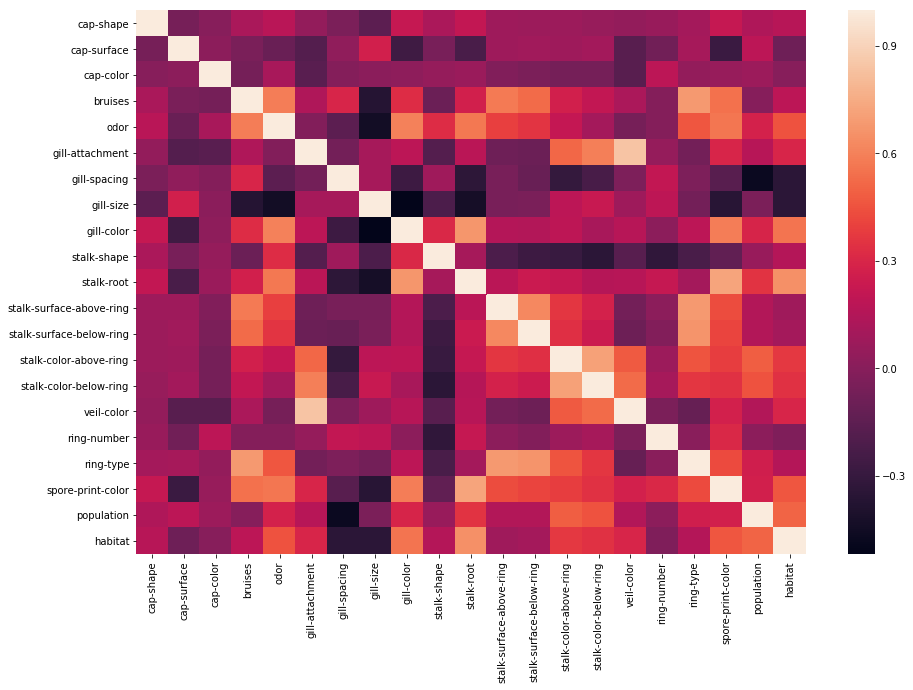

In [6]:
# pass in our X variable and visualize it with a seaborn heatmap.
plt.figure(figsize=(15,10))
corr = X.corr()
sns.heatmap(corr);

This is a nice looking heatmap. None of our features look highly correlated, however these heatmaps can be hard to interpret for some of us color challenged people, so let's take a look at the top five most correlated features in a language we can all understand. Numbers.

In [7]:
print(X.corr().unstack().sort_values().drop_duplicates()[:5])

gill-color  gill-size      -0.518717
population  gill-spacing   -0.474326
gill-size   odor           -0.444492
            stalk-root     -0.434232
bruises     gill-size      -0.369596
dtype: float64


Perfect. So we now know our highest correlations are actually negatively correlated and that they are not highly correlated. We will move on to building our first model, where we will utilize sklearns Random Forest Classifier algorithm to determine our most important features.

In [8]:
clf = RandomForestClassifier(n_estimators=X_train.shape[0], random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)
features = []
# Print the name and gini importance of each feature
for feature in zip(X_train, clf.feature_importances_):
    features.append(feature)
    
# sort features and print out the 30 most important.
features.sort(key=operator.itemgetter(1))
features

[('cap-shape', 0.0023656476974860253),
 ('gill-attachment', 0.0026369618061099897),
 ('veil-color', 0.003403534475242571),
 ('stalk-color-below-ring', 0.010852199631460849),
 ('cap-surface', 0.013043403130270505),
 ('cap-color', 0.013605447771597412),
 ('ring-number', 0.015334324177227817),
 ('stalk-color-above-ring', 0.015817063070476502),
 ('stalk-shape', 0.019229916249384003),
 ('gill-spacing', 0.025388792265764182),
 ('population', 0.026739364657222854),
 ('habitat', 0.029152473924258977),
 ('stalk-root', 0.032534345726330266),
 ('bruises', 0.03317217491233327),
 ('gill-color', 0.035048691767225804),
 ('stalk-surface-below-ring', 0.05354372708748896),
 ('ring-type', 0.05682072276490275),
 ('stalk-surface-above-ring', 0.06642949082483424),
 ('gill-size', 0.08495024400537518),
 ('spore-print-color', 0.12858065057694143),
 ('odor', 0.33135082347806577)]

The sum of our features is one. Odor is above and beyond our biggest indicator of whether a mushroom is edible or poisonous. Let's take a deeper dive and inspect our top three most important features, and explore the data visually to determine if there is an obvious relationship between the values of our feature in our class.  

First we'll decipher how many mushrooms in our class are edible and how many are poisonous.

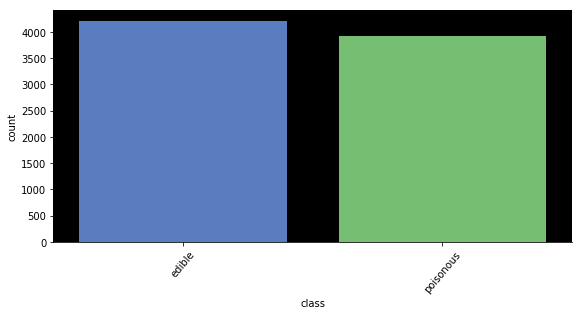

In [9]:
xticklabels = ['edible', 'poisonous']

g = sns.factorplot(x="class", data=df, aspect=2, kind="count", palette='muted', order=df['class'].value_counts().index);
g.set_xticklabels(xticklabels,rotation=50);

Our split is pretty close with there being slightly more edible samples in our dataset. 

Let's look at our most important feature: Odor

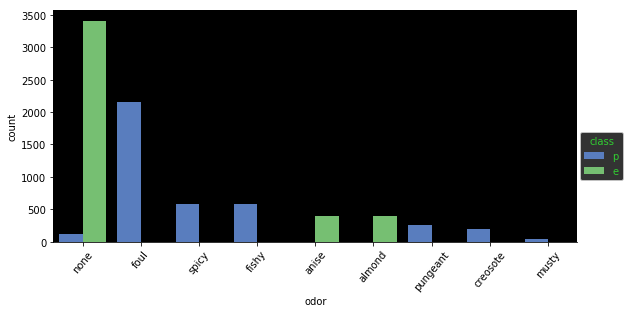

In [10]:
xticklabels = ['none', 'foul', 'spicy', 'fishy', 'anise', 'almond', 'pungeant', 'creosote', 'musty']
g = sns.factorplot(x='odor', hue = "class", data=df, aspect=2, kind="count", palette='muted', order=df['odor'].value_counts().index);
g.set_xticklabels(xticklabels,rotation=50);

Keep in mind that our dataset covers two families of mushrooms and there are uncountable amounts of mushroom species out there. Even for experts it is difficult sometimes to tell mushrooms apart please be careful. The fact that almost all mushrooms that have no smell aren't poisonous, and all of our mushrooms that are foul are sticks out. After taking a further look you can see it is pretty easy to tell them apart by the odor in our dataset. They can be split into two distinct categories. If it's spicy, fishy, pungent, creosote or musty than it is poisonous, and if it's odorless, anise, or almond you can assume it's edible.!

Next up is the spore print color. A spore print is a group of spores that look like a powder. To understand what a spore is, it is comparable to a seed. 

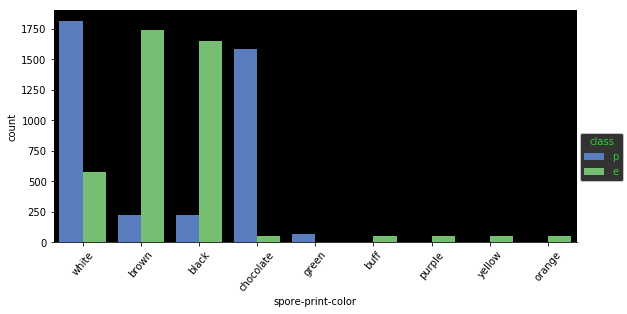

In [11]:
xticklabels = ['white', 'brown', 'black', 'chocolate', 'green', 'buff', 'purple', 'yellow', 'orange']
g = sns.factorplot(x='spore-print-color', hue = "class", data=df, aspect=2, kind="count", palette='muted', order=df['spore-print-color'].value_counts().index);
g.set_xticklabels(xticklabels,rotation=50);

Looking at the spore print colors is a little bit harder to determine. White and chocolate tend to be poisonous, but it can also be edible, brown and black are the opposite, mostly edible, but can be poisonous. I would say this is a good supportive feature, but definitely not a key indicator. 

A mushrooms gill is the flap on the underside of the mushroom cap.

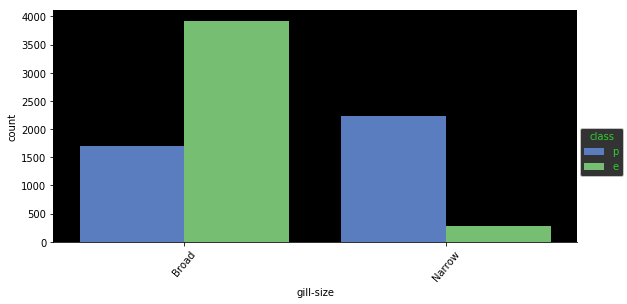

In [12]:
xticklabels = ['Broad', 'Narrow']
g = sns.factorplot(x='gill-size', hue = "class", data=df, aspect=2, palette='muted', kind="count",order=['b','n']);
g.set_xticklabels(xticklabels,rotation=50);

These are kind of all over the place with a majority of broad being poisonous and narrow, edible. As our feature importance gets lower you can clearly see that it is getting harder to determine whether or not a mushroom is poisonous. If you found an unidentifiable broad mushroom with this being the only data visualization you can see would you eat it? Now what if it was odorless, brown, and broad? The odds seem better right?

Our data looks pretty good, so we'll start building our first model. We'll use a Bernoulli Naive Bayes classifier. We will examine the quality of our model by looking at its r squared score as well as a cross validation r squared score. We will also print out the mislabeled points along with a confusion matrix. Naive Bayes really excels when it comes to text classification, so it is interesting to see how it is going to react to our dataset. It is also important to remember that features are assumed to be independent of each other, so it is important that your features aren't too highly correlated. Naive bayes very fast and simple to implement and it also works great with high dimensional data. Now let's see how many mushrooms we can correctly identify!


In [13]:
# Instantiate our model and store it in a new variable.

start_time = time.monotonic()

bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train, y_train)

print('R score:')
print(bnb.score(X_test, y_test))
print('Cross validation R score:')
print(cross_val_score(bnb, X_test, y_test, cv=5))
# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    X_test.shape[0],
    (y_test != y_pred).sum()
))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

end_time = time.monotonic()
print('Time:', timedelta(seconds=end_time - start_time))

R score:
0.9126153846153846
Cross validation R score:
[0.86196319 0.88650307 0.92       0.89814815 0.91049383]
Number of mislabeled points out of a total 1625 points : 142
Confusion Matrix: [[661 112]
 [ 30 822]]
Time: 0:00:00.054367


96.5%. We will now repeat the process this time solving our specificity score, which you guessed it, is just the opposite of our sensitivity score. We will sum our false positives and negatives 661 + 112 which is equal to 773. We will then divide our correctly selected negatives 661 and divide it by our total number of negatives, which is 773, so 661/773 = 85.5% which is our specificity score. We now know that we are predicting our edible mushrooms better than our poisonous mushrooms.


Now it's time to engage our effort into a more advanced model. We'll now input our K nearest neighbor’s classifier to determine whether or not we can get a better score on our data. K nearest neighbors works by plotting the information we want to know, and then taking votes from all the surrounding points in the data set in order to attempt classifying the data correctly. KNN is a solid model and excels with tasks such as recommending products and movies. The algorithm is flexible with features, handles multi-class cases and also allows you to choose your distance measurement, however it can be resource heavy and works best when there is enough data to represent what we are searching for. We will examine our success in much the same way as we did with our Naive Bayes classifier. It's time.


In [14]:
start_time = time.monotonic()

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

# Set up our prediction line.

print('R score:')
print(knn.score(X_test, y_test))
print('Cross validation R score:')
print(cross_val_score(knn, X_test, y_test, cv=5))
y_pred = knn.predict(X_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    X_test.shape[0],
    (y_test != y_pred).sum()
))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
end_time = time.monotonic()
print('Time:', timedelta(seconds=end_time - start_time))

R score:
1.0
Cross validation R score:
[0.97546012 0.98773006 0.99692308 0.99691358 0.99074074]
Number of mislabeled points out of a total 1625 points : 0
Confusion Matrix: [[773   0]
 [  0 852]]
Time: 0:00:00.276762


Our KNN model has proven its worth. It is working exceptionally, is predicting our data near perfectly. We achieved a perfect score on our training data, and a near perfect score on our test data. Our sensitivity and specificity are perfect. As you can see from our time metric, the KNN algorithm took nearly six times as long as our Naive Bayes model.

Our KNN model worked very well, and with the data size wasn't too resource expensive. We're now going to build our Support Vector Machine Classifier model. SVM has been around for a very long time, and has become popular again in recent history. It is great with multi-class information, high dimensional data, accuracy, and works well with small datasets. It can be very, very resource intensive, which will not take you long to figure out if you utilize this model. SVM is also prone to over fitting which can be a problem.


In [15]:
start_time = time.monotonic()

# fitting the data to the model
svc = SVC()
svc.fit(X_train,y_train)

# testing the R score
print('R score:')
print(svc.score(X_test, y_test))
print('Cross validation R score:')
print(cross_val_score(svc, X_test, y_test, cv=5))
y_pred = knn.predict(X_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    X_test.shape[0],
    (y_test != y_pred).sum()
))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
end_time = time.monotonic()
print('Time:', timedelta(seconds=end_time - start_time))

R score:
1.0
Cross validation R score:
[1.         1.         1.         0.99691358 1.        ]
Number of mislabeled points out of a total 1625 points : 0
Confusion Matrix: [[773   0]
 [  0 852]]
Time: 0:00:00.469113


Would you look at that. Perfection. Our SVM classifier is working very well even outperforming our KNN algorithm in our cross validation scoring. We again have perfect specificity and sensitivity scores. Look at that time though, wow. This model took ten times as long to run as our original Naive Bayes model. It is easy to see the downfall of this model. Though it is highly accurate, it is very slow.

Now we'll take a look at one of my favorite classifiers, The Random Forest classifier. Random forest is known as an ensemble method. What that means is several decision tree classifiers will be created, and each decision tree will receive a vote (sound familiar?) on the outcome for each given observation. Random forest excels at many things including lowering variance, preventing over fitting, providing importance measures like our feature selection earlier, and it also works great for classification and regression. It is difficult to interpret the results, because of how it is calculated.


In [16]:
start_time = time.monotonic()

rfc = ensemble.RandomForestClassifier(n_jobs=-1)

rfc = rfc.fit(X, y)

print('R score:')
print(rfc.score(X_test, y_test))
print('Cross validation R score:')
print(cross_val_score(rfc, X_test, y_test, cv=5))
y_pred = rfc.predict(X_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    X_test.shape[0],
    (y_test != y_pred).sum()
))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
end_time = time.monotonic()
print('Time:', timedelta(seconds=end_time - start_time))

R score:
1.0
Cross validation R score:
[0.99693252 1.         1.         1.         1.        ]
Number of mislabeled points out of a total 1625 points : 0
Confusion Matrix: [[773   0]
 [  0 852]]
Time: 0:00:01.456283


Our random forest model has proven to be effective echoing similar results to our KNN, and SVM models. But wow would you look at the time it took to run? It higher than all of our other scores combined. You can see how that can be a problem. However it is a highly effective method and often times the pros outweigh the cons.

## Discussion and Conclusion:
We have covered a lot of information in our short time together. First we imported our dataset, examined the variables and converted our data to numerical values, which then allowed us to proceed examining the data with various statistical measures and models. Checking for correlation was a breeze. We chose our income and outcome variables from our various features and even determined which features are most important. 
        
We then took a deeper dive into our top three most important features determining that odor is the biggest tell when it comes to a mushroom being poisonous or not. Spore print color and gill size have proven to be effective secondary predictors, but they are a little bit harder to decipher with the naked eye. 
        
After examining our features we decided to jump into building some models. We built four different models including a Naive Bayes classifier, K Nearest Neighbors classifier, Support Vector Classifier, and a Random Forest classifier. Naive Bayes proved to be the least effective in predicting our mushrooms, with only about a 90% prediction accuracy. The rest of our models on the other hand performed very well, all correctly classifying all of the information. What really set our other models apart is the speed. KNN performed faster than both our Support Vector classifier and our Random Forest classifier.
        
Mushroom classification is very fun and rewarding, but also very dangerous. It is important to only eat mushrooms if you are 100% sure that the mushroom isn't poisonous. It is also important to note that our study has some bias, because there were only two families of mushrooms tested, with there being a large amount of other families. We were able to predict two different families of mushrooms, which include Agaricus and Lepiota with a 100% accuracy rate with multiple models, and the score remained consistent across different sample sets. I would label this experiment a success. This useful will be useful for learning about data evaluation, different models, and mushrooms. If i had to choose one model, I would go with SVM as it seemed to do just a little bit better than the rest.
